# Climate change analysis
## Historic CO2 emissions

### This is the char that you always see ...

![](https://gml.noaa.gov/webdata/ccgg/trends/co2_data_mlo.png)

The graphs show monthly mean carbon dioxide measured at Mauna Loa Observatory, Hawaii. The carbon dioxide data on Mauna Loa constitute the longest record of direct measurements of CO2 in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO2 measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989]. 

## ...pero en España también tenemos datos

![](https://informacionturisticatenerife.com/wp-content/uploads/2019/07/observatoriodelteide1.jpg)

https://www.epdata.es/asi-aumentado-concentracion-co2/2f1e490f-4a53-4534-a9c0-40f2860316bc

## Prepare the environment

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import locale
locale.setlocale(locale.LC_TIME, '')

'es_ES.UTF-8'

## Load the libraries

In [99]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

## Load the data

In [16]:
df = pd.read_csv('data/co2_izana.csv', sep=';')

## Explore the data

## Clean the data

In [34]:
df.dropna(inplace=True)

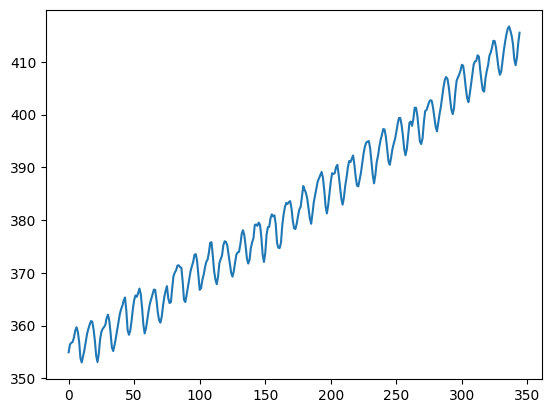

In [35]:
plt.plot(df.dropna().CO2.str.replace(',','.').astype('float'))

In [36]:
from datetime import datetime

In [37]:
help(datetime.strftime)

Help on method_descriptor:

strftime(...)
    format -> strftime() style string.



In [39]:
datetime.strptime('Enero 1991', '%B %Y')

datetime.datetime(1991, 1, 1, 0, 0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Año      345 non-null    object
 1   Periodo  345 non-null    object
 2   CO2      345 non-null    object
dtypes: object(3)
memory usage: 10.8+ KB


In [42]:
datos['fecha'] = df.apply(lambda x: datetime.strptime(f"{x['Periodo']} {x['Año']}", '%B %Y'), axis=1)

In [20]:
datos = pd.DataFrame()

In [21]:
datos['co2'] = df.dropna().CO2.str.replace(',','.').astype('float')

<AxesSubplot: xlabel='fecha'>

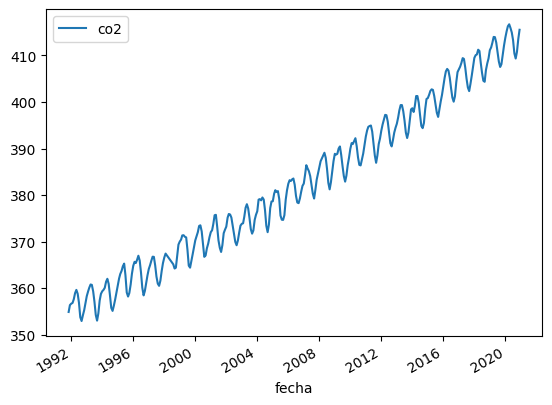

In [43]:
datos.set_index('fecha').plot()

In [45]:
serie = datos.set_index('fecha')

In [67]:
serie.interpolate().isnull().sum()

co2    0
dtype: int64

In [68]:
serie = serie.resample('M').mean().interpolate()

## Time series analysis

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
components = seasonal_decompose(serie)

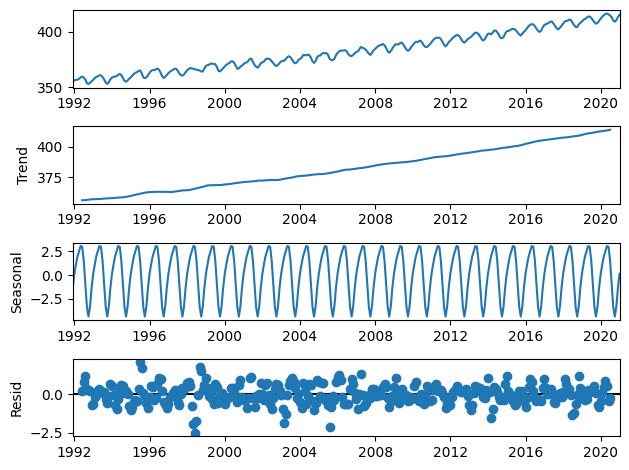

In [73]:
_= components.plot()

## Time series prediction

In [74]:
from darts import TimeSeries

In [76]:
#Loading the pandas dataframe to a TimeSeries object as required by the Darts library
series = TimeSeries.from_dataframe(serie)

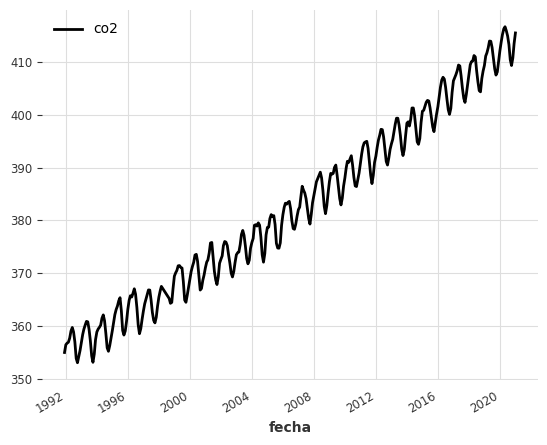

In [77]:
series.plot()

In [106]:
import darts.models as dm

In [80]:
model = dm.NaiveSeasonal(K = 12)
model_name = 'Naive Seasonal'

In [91]:
start = pd.Timestamp(year=2019, month=1, day=1)
forecast = model.historical_forecasts(series, start=start, forecast_horizon=12, verbose=True)

  0%|          | 0/13 [00:00<?, ?it/s]

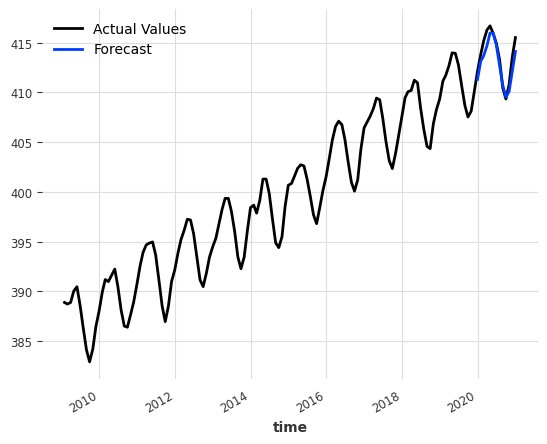

In [92]:
series[-144:].plot(label='Actual Values')
forecast.plot(label= 'Forecast')

In [90]:
model = dm.ExponentialSmoothing(seasonal_periods = 12)
model_name = 'Exponential Smoothing'

In [91]:
start = pd.Timestamp(year=2019, month=1, day=1)
forecast = model.historical_forecasts(series, start=start, forecast_horizon=12, verbose=True)

  0%|          | 0/13 [00:00<?, ?it/s]

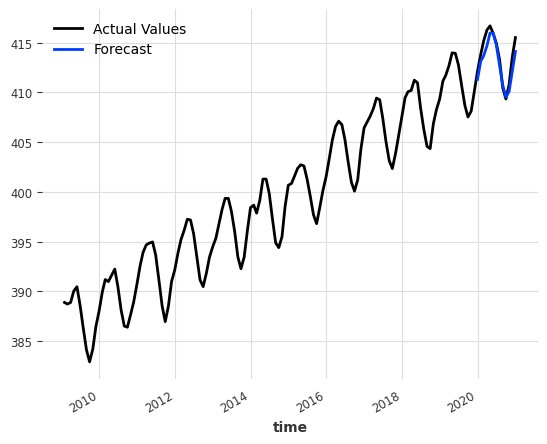

In [92]:
series[-144:].plot(label='Actual Values')
forecast.plot(label= 'Forecast')

In [95]:
model.fit(series)

In [96]:
forecast = model.predict(12)

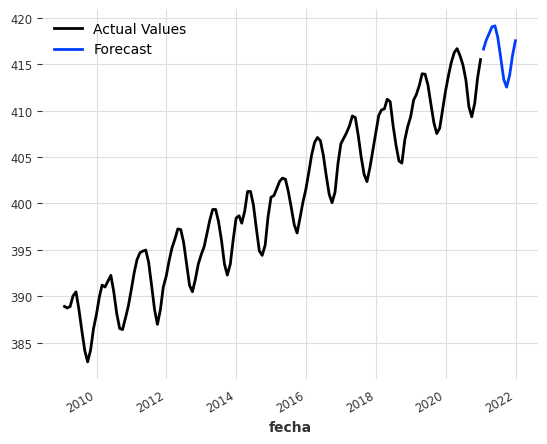

In [97]:
series[-144:].plot(label='Actual Values')
forecast.plot(label= 'Forecast')